Librerias

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Imagenes

In [46]:
data_dir_str = "/content/drive/MyDrive/Proyecto_mangocateros/Proyecto_Mango/unidas/TommyAtkins"
data_dir = pathlib.Path(data_dir_str)

In [47]:
Fisiopatologias = (list(data_dir.glob('Enfermo/*.JPG'))+
                   list(data_dir.glob('Enfermo/*.jpg'))+
                   list(data_dir.glob('Enfermo/*.png'))+
                   list(data_dir.glob('Enfermo/*.jpeg')))

Sanas = (list(data_dir.glob('Sanos/*.JPG'))+
         list(data_dir.glob('Sanos/*.jpg'))+
         list(data_dir.glob('Sanos/*.png'))+
            list(data_dir.glob('Sanos/*.jpeg')))

print(len(Fisiopatologias))
print(len(Sanas))

335
204


In [48]:
batch_size = 32 #Número de ejemplos que se pasan al algoritmo en cada iteración de aprendizaje
img_height = 200
img_width = 200

In [49]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 539 files belonging to 2 classes.
Using 432 files for training.


In [50]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 539 files belonging to 2 classes.
Using 107 files for validation.


In [51]:
class_names = train_ds.class_names
print(class_names)

['Enfermo', 'Sanos']


In [52]:
print(type(train_ds)) #lista de tuplas de forma (batch images, labels)
tensor1,labels1=next(iter(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [53]:
print(tensor1) #Relaciones multilineales
print(labels1)

tf.Tensor(
[[[[ 59.5696    66.5696    72.5696  ]
   [ 53.9532    62.9532    67.9532  ]
   [ 56.        65.        70.      ]
   ...
   [200.18024  118.08213  127.441986]
   [186.89565  127.89564  146.04678 ]
   [185.57495  128.57495  143.57495 ]]

  [[ 53.18      60.18      66.18    ]
   [ 58.6132    67.6132    72.6132  ]
   [ 58.698     67.698     72.698   ]
   ...
   [196.95999  116.14198  114.541885]
   [189.49301  120.773285 120.13315 ]
   [196.67995  133.67995  144.67995 ]]

  [[ 53.50199   60.50199   66.502   ]
   [ 49.92      58.92      63.92    ]
   [ 57.67      66.67      71.67    ]
   ...
   [219.37004  136.37004  128.37004 ]
   [209.882    122.88201  115.88201 ]
   [209.95195  143.01201  149.83183 ]]

  ...

  [[122.27372  137.27371  158.27371 ]
   [136.1997   153.1997   173.1997  ]
   [ 54.600883  56.600883  71.60088 ]
   ...
   [244.3305   242.9306   204.9306  ]
   [237.60059  206.32031  193.14038 ]
   [247.14792  200.14792  194.14792 ]]

  [[134.83119  151.34238  171.5867

Enfermo


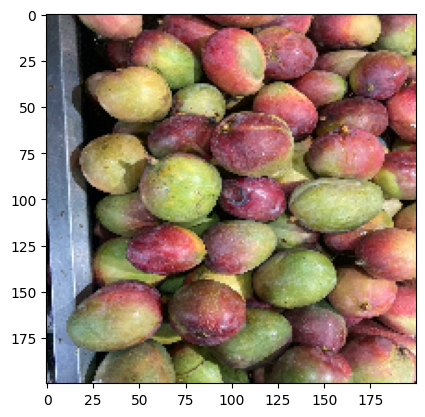

In [54]:
plt.imshow(tensor1[0].numpy().astype("uint8"))
print(class_names[labels1[0]])

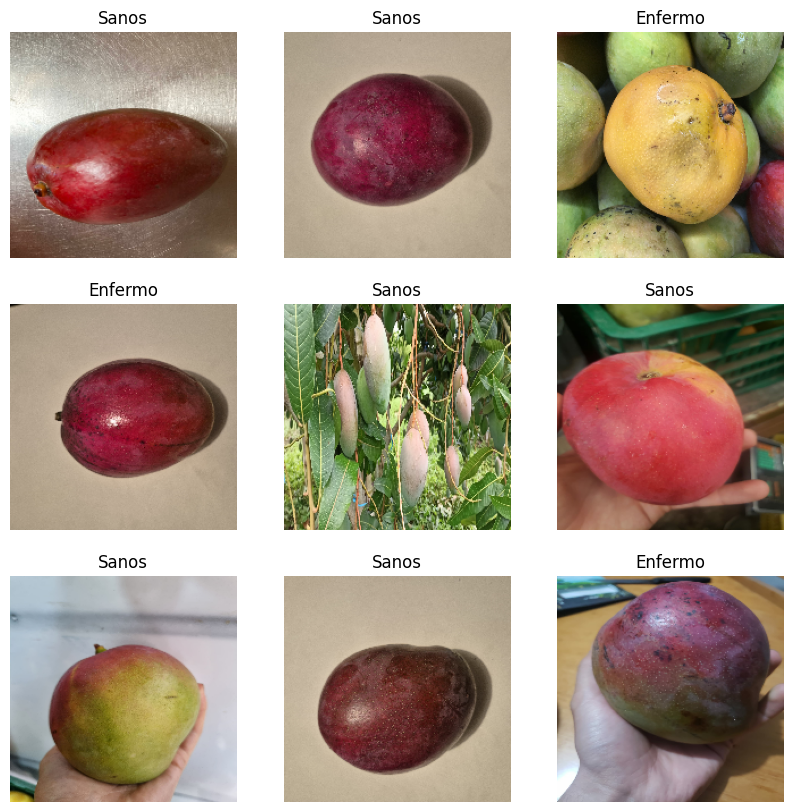

In [55]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8")) #uint8 array de enteros sin signo de 8bits.Inicia en 0
        plt.title(class_names[labels[i]])
        plt.axis("off")

0.026182294     1.0


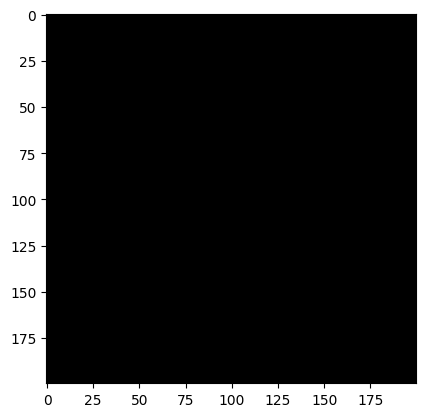

In [56]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image),'   ', np.max(first_image))
plt.imshow(first_image.numpy().astype("uint8"))

Configuración del dataset

In [57]:
AUTOTUNE = tf.data.AUTOTUNE #Corregir data?

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [58]:
num_classes = 2

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 200, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 100, 100, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      73792     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 50, 32)       

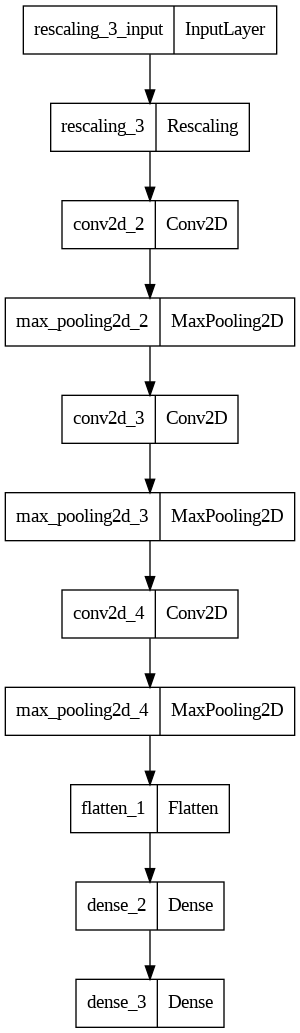

In [61]:
from keras.utils import plot_model

plot_model(model)

In [62]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

#Objeto tipo history: encapsula el string(secuencia de caracteres) que se muestra en un campo de historial de un registro de datos

Epoch 1/10
14/14 [==============================] - 152s 9s/step - loss: 0.9578 - accuracy: 0.5440 - val_loss: 0.6621 - val_accuracy: 0.5981
Epoch 2/10
14/14 [==============================] - 98s 7s/step - loss: 0.6455 - accuracy: 0.6412 - val_loss: 0.6281 - val_accuracy: 0.6449
Epoch 3/10
14/14 [==============================] - 96s 7s/step - loss: 0.6311 - accuracy: 0.6458 - val_loss: 0.6306 - val_accuracy: 0.5981
Epoch 4/10
14/14 [==============================] - 93s 7s/step - loss: 0.6119 - accuracy: 0.6644 - val_loss: 0.6184 - val_accuracy: 0.6729
Epoch 5/10
14/14 [==============================] - 94s 7s/step - loss: 0.5894 - accuracy: 0.6759 - val_loss: 0.6010 - val_accuracy: 0.6916
Epoch 6/10
14/14 [==============================] - 105s 7s/step - loss: 0.5705 - accuracy: 0.7060 - val_loss: 0.5967 - val_accuracy: 0.6729
Epoch 7/10
14/14 [==============================] - 103s 7s/step - loss: 0.5540 - accuracy: 0.7153 - val_loss: 0.5713 - val_accuracy: 0.6916
Epoch 8/10
14/14 

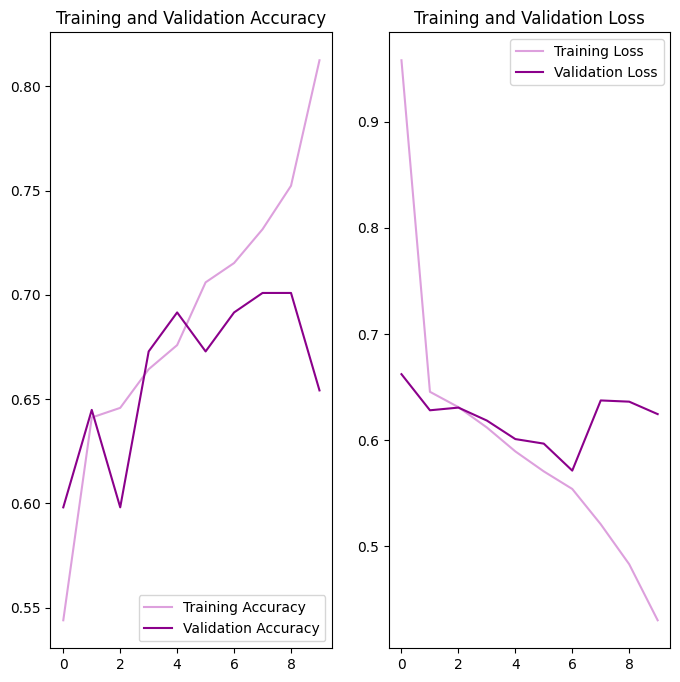

In [63]:
#history.history es un diccionario que contiene los valores de la función de perdida y las métricas escogidas para
#cada conjunto de datos y cada época como listas.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy',c='plum')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',c='darkmagenta')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss',c='plum')
plt.plot(epochs_range, val_loss, label='Validation Loss',c='darkmagenta')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [64]:
img1 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Enfermedad.JPG', target_size=(img_height, img_width)
)
img2= tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Insectos.png', target_size=(img_height, img_width)
)
img3 = tf.keras.utils.load_img(
    '/content/drive/MyDrive/Carpeta_proyecto_mango_aguacate/Proyecto_Mango/Sanos.jpeg', target_size=(img_height, img_width)
)

In [65]:
img_array1 = tf.keras.utils.img_to_array(img1)
img_array1 = tf.expand_dims(img_array1, 0) # Create a batch

predictions = model.predict(img_array1)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Fisiopato

1/1 [==============================] - 0s 140ms/step
This image most likely belongs to Enfermo with a 65.78 percent confidence.


In [66]:
img_array2 = tf.keras.utils.img_to_array(img2)
img_array2 = tf.expand_dims(img_array2, 0)

predictions = model.predict(img_array2)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Insecto

1/1 [==============================] - 0s 62ms/step
This image most likely belongs to Enfermo with a 61.52 percent confidence.


In [67]:
img_array3 = tf.keras.utils.img_to_array(img3)
img_array3 = tf.expand_dims(img_array3, 0) # Create a batch

predictions = model.predict(img_array3)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) #Sano

1/1 [==============================] - 0s 62ms/step
This image most likely belongs to Enfermo with a 78.41 percent confidence.


4/4 [==============================] - 6s 1s/step


Text(50.722222222222214, 0.5, 'Real')

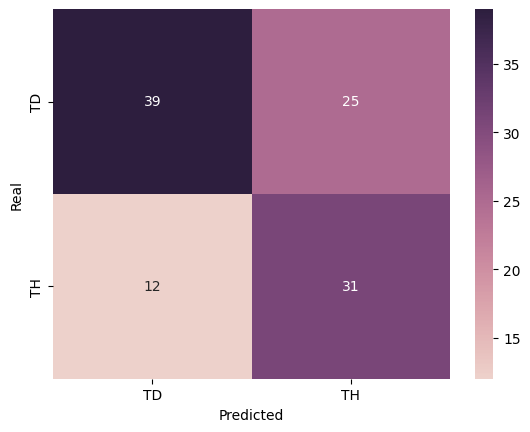

In [68]:
predict = model.predict(val_ds).argmax(axis=1)

import pandas as pd
data = pd.DataFrame()
for images, labels in val_ds:
    data1 = pd.DataFrame(labels)
    data = pd.concat([data,data1],axis=0)

data.columns = ['Real']
data = data.reset_index(drop=True)

pred = pd.DataFrame(predict)
pred.columns = ['Pred']
data_fin = pd.concat([data,pred],axis=1)

data_fin = data_fin.replace({0:'TD',1:'TH'})

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x_axis_labels = ['TD','TH']
y_axis_labels = ['TD','TH']

sns.heatmap(confusion_matrix(data_fin['Real'],data_fin['Pred']),annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted')
plt.ylabel('Real')